# Supervised learning introduction, K-Nearest Neighbors (KNN)
-----


#### 1. Read data

The provided three files (glass.data, glass.tag, glass.names) contains a small dataset. "[The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)"

 - read the content of the glass.data file as a pandas dataframe
 - use the column names found in the glass.names file
 - if needed, handle the missing values
 - get rid of the ID column
 - separate the GlassType from the dataset and store it in a one-hot encoded manner (if we have 3 classes, than instead of 1, 2, 3 we use [1, 0, 0], [0, 1, 0] and [0, 0, 1]. So each dimension represents a class and 1 means the sample belongs to that class, 0 is the opposite)
    - be careful, the data contains only 1-2-3-5-6-7, 4 is missing! Convert 5 $\to$ 4, 6 $\to$ 5 and 7 $\to$ 6 and then apply the one-got encoding
    - also keep the converted labels, where y is 1-2-3-4-5-6, we will need them later
 
-----

#### 2. \& 3. Implement KNN

Implement the K-nearest neighbors regression algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporing the given class divided by **k** (for example if **k** is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). 

Complete the function!

```python
def knn_classifier(k, X_train, y_train, X_test):
    ...
    return predictions
```
 - **k** is the number of neighbors to be considered
 - **X_train** is the training data points
 - **X_test** is the test data points
 - **y_train** is the labels for the training data
 - assume that **y_test** is one-hot encoded.

A valid-syntaxed input looks like:
````python
k = 2
X_train = [[0.9, 0.2, 0.8] , [-1.2, 1.5, 0.7], [5.8, 0.0, 0.9], [6.2, 0.9, 0.9]]
y_train = [[0, 1], [0, 1], [1, 0], [0, 1]]
X_test  = [[0.8, 0.8, 0.6], [0.5, 0.4, 0.3]]
```

Here, it means that the training data consists of 4 points, each point is placed in a 3 dimensional space. And there are two possible classes for each point and there are two data points for that predictions is needed.

#### 4. Predictions & interpretation

- use every second (0, 2, 4, etc indicies) datapoint as training data and use the rest (1, 3, 5, ...) as test data
- generate predictions with the implemented KNN with k=5
- calculate the accuracy and the confusion matrix for the predictions
- if the probability is the same for two or more classes select the first one from the left in the one-hot encoded version (or which has the smallest number in the original dataset)

-----

#### 5. Compare it to Sklearn's KNN
- using the same train/test split generate predictions with sklearn KNNs. Use 5 neighbors again
- are the predictions the same as for our implementation? (they should be)
   - note: to get sklearn perform the same algorithm as out implementation it expects you to provide non one-hot encoding labels. That's why we kept them in the first exercise


-----


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 1) Read data

The provided three files (glass.data, glass.tag, glass.names) contains a small dataset. "[The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)"

 - read the content of the glass.data file as a pandas dataframe
 - use the column names found in the glass.names file
 - if needed, handle the missing values
 - get rid of the ID column
 - separate the GlassType from the dataset and store it in a one-hot encoded manner (if we have 3 classes, than instead of 1, 2, 3 we use [1, 0, 0], [0, 1, 0] and [0, 0, 1]. So each dimension represents a class and 1 means the sample belongs to that class, 0 is the opposite)
    - be careful, the data contains only 1-2-3-5-6-7, 4 is missing! Convert 5 $\to$ 4, 6 $\to$ 5 and 7 $\to$ 6 and then apply the one-got encoding
    - also keep the converted labels, where y is 1-2-3-4-5-6, we will need them later
 
-----

In [2]:
data = pd.read_csv("glass.data",index_col = 0, names = ["RI","Na","Mg","Al", "Si","K", "Ca", "Ba", "Fe","Type"] )
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Number of missing values by column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


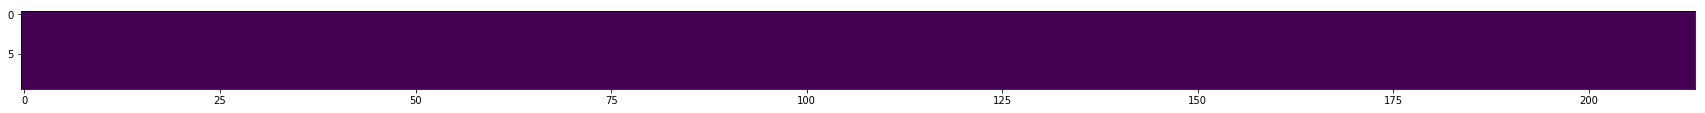

In [3]:
plt.figure(figsize = [30,3])
plt.imshow(data.isna().T)
print("Number of missing values by column:\n",data.isna().sum())

<b> No missing values found. <b>

In [4]:
convert_dict = {5: 4, 6: 5, 7: 6}
data["Type"] = data["Type"].map(convert_dict).fillna(data["Type"]) #Make the necessary conversion mentioned above
data["Type"] = pd.Series(data["Type"], dtype = np.int16)

one_hot_enc = pd.get_dummies(data["Type"]) #perform one-hot encoding

data = data.join(one_hot_enc)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,1,2,3,4,5,6
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1,0,0,0,0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,0,0,0,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,0,0,0,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,0,0,0,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,0,0,0,0,0


In [5]:
data.Type.value_counts() #We can see, that the conversion was succesful,

2    76
1    70
6    29
3    17
4    13
5     9
Name: Type, dtype: int64

In [6]:
for col in data.columns[10:]:
    print(col,": " , data[col].sum()) # and the encoding is successful as well.

1 :  70
2 :  76
3 :  17
4 :  13
5 :  9
6 :  29


# 2-3) kNN implementation

In [7]:
x_train = np.array([[0.9, 0.2, 0.8] , [-1.2, 1.5, 0.7], [5.8, 0.0, 0.9], [6.2, 0.9, 0.9]])
y_train = np.array([[0, 1], [0, 1], [1, 0], [0, 1]])
x_test  = np.array([[0.8, 0.8, 0.6], [0.5, 0.4, 0.3]])

In [8]:
def kNN (k , x_train, y_train, x_test):
    PROBS = []
    for q in x_test:
        distances = []
        
        for x in x_train:
            distances.append(np.linalg.norm(q - x)) #take the euclidean (L2) norm of the difference
            
        vote_list = [ q for _,q in sorted(zip(distances,y_train))] #neighbours "vote" by descending distance
        
        prob = np.array(vote_list[:k]).sum(axis = 0) / k 
        #sum the votes and divide by k -> probability of being member of a certain cluster
        PROBS.append(prob)
    return np.array(PROBS)

# 4) Predict & evaluate

In [9]:
x_train = np.array(data[::2][["RI","Na","Mg", "Al" ,"Si" ,"K" ,"Ca" ,"Ba","Fe"]])
y_train = np.array(data[::2][[1,2,3,4,5,6]])
x_test = np.array(data[1::2][["RI","Na","Mg", "Al" ,"Si" ,"K" ,"Ca" ,"Ba","Fe"]])
y_test = np.array(data[1::2][[1,2,3,4,5,6]])

kNN_probs = kNN(5,x_train,y_train,x_test)

In [10]:
kNN_probs[:5,:] # the probability of the first five elements being associated with the certain cluster

array([[0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.2, 0.6, 0.2, 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ]])

In [11]:
kNN_preds = np.argmax(kNN_probs,axis  = 1) + 1
#the result of classification: choose the largest probability of association,
#in case of multiple occurrances of the maximum values, the one with the lowest index is returned
#reason of +1: indexing starts at 0, while our encoding is in the range of 1-6

y_true = np.argmax(y_test, axis = 1) + 1

Text(0.5, 1.0, 'Confusion matrix')

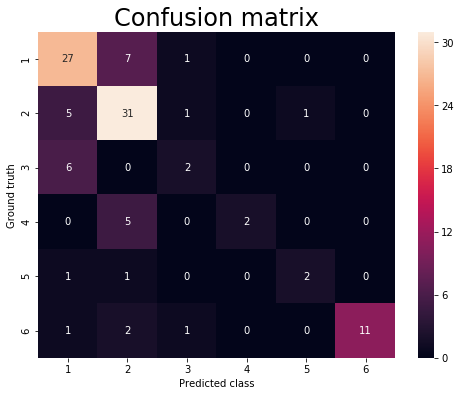

In [12]:
from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(y_true, kNN_preds)
conf_matr_annot = pd.DataFrame(conf_matr, columns = np.arange(1,7), index = np.arange(1,7))

plt.figure(figsize=[8,6])
sns.heatmap(conf_matr_annot, annot = True)
plt.ylabel("Ground truth")
plt.xlabel("Predicted class")
sns.set(font_scale=2)
plt.title("Confusion matrix")

#Sci-kitlearn docs:
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label being 
#i-th class and predicted label being j-th class.

In [13]:
(conf_matr.sum() - np.diag(conf_matr).sum()) / conf_matr.sum() 
# Error-ratio: 0.299

0.29906542056074764

We can conclude, that kNN with k = 5 predicts the labels with quite good accuracy when the ground trouth is 1, 2 or 6, but performs poorly on 3,4 or 5. The main reason behind the lower accuracy can be that it has fewer occurances in the dataset. <br> <b>In average the accurately predicted ratio of labels is 70%.

In [14]:
def my_confusion_matrix(x_train, y_train , x_test):
    kNN_probs = kNN(5,x_train, y_train,x_test)
    kNN_preds = np.argmax(kNN_probs,axis  = 1) + 1
    conf_matr = confusion_matrix(y_true, kNN_preds)
    conf_matr_annot = pd.DataFrame(conf_matr, columns = np.arange(1,7), index = np.arange(1,7))
    return conf_matr_annot
    
    

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sscaler = StandardScaler()
mmscaler = MinMaxScaler()

x_train_std = sscaler.fit_transform(x_train)
x_test_std = sscaler.transform(x_test)

x_train_mm = mmscaler.fit_transform(x_train)
x_test_mm = mmscaler.transform(x_test)

cm_std = my_confusion_matrix( x_train_std, y_train ,  x_test_std)
cm_mm = my_confusion_matrix( x_train_mm, y_train ,  x_test_mm)

Text(0.5, 1.0, 'MinMax norm')

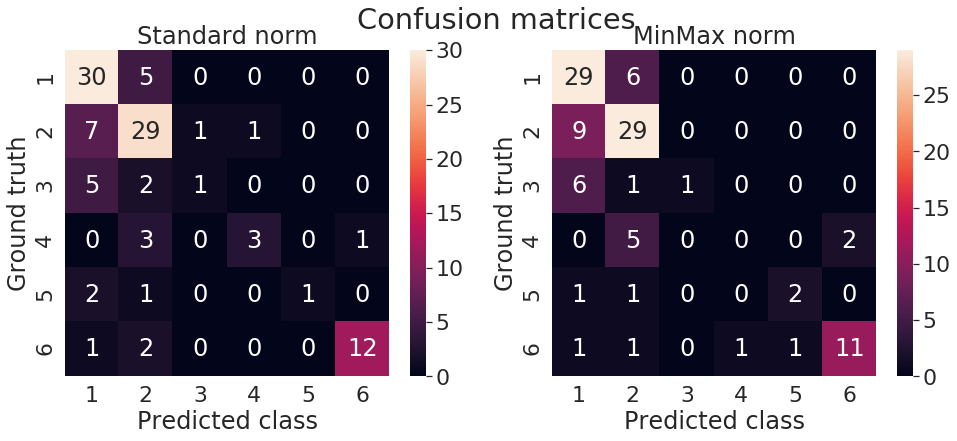

In [16]:
fig, axes = plt.subplots(1,2, figsize=[16,6])
sns.heatmap(cm_std,ax = axes[0], annot = True)
fig.suptitle("Confusion matrices")

axes[0].set_ylabel("Ground truth")
axes[0].set_xlabel("Predicted class")
sns.set(font_scale=2)
axes[0].set_title("Standard norm")

sns.heatmap(cm_mm,ax = axes[1], annot = True)
axes[1].set_ylabel("Ground truth")
axes[1].set_xlabel("Predicted class")
sns.set(font_scale=2)
axes[1].set_title("MinMax norm")



In [17]:
cm_std.to_numpy()

array([[30,  5,  0,  0,  0,  0],
       [ 7, 29,  1,  1,  0,  0],
       [ 5,  2,  1,  0,  0,  0],
       [ 0,  3,  0,  3,  0,  1],
       [ 2,  1,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0, 12]])

In [18]:
print("normalized with standard scaler - error ratio:",(cm_std.to_numpy().sum() - np.diag(cm_std.to_numpy()).sum()) / cm_std.to_numpy().sum() )
print("normalized with minmax scaler - error ratio:",(cm_mm.to_numpy().sum() - np.diag(cm_mm.to_numpy()).sum()) / cm_mm.to_numpy().sum() )

normalized with standard scaler - error ratio: 0.2897196261682243
normalized with minmax scaler - error ratio: 0.32710280373831774


My first thought was that we could reach better accuracy by normalizing the data. I used two different normalizer method: the standard scaler and the minmax scaler.  <br>
From the confusion matrices and the error-ratios we can conclude, that in this case normalization hasn't brought much better solutions to the table.

# 5) Scikit comparison

Text(0.5, 1.0, 'From scratch')

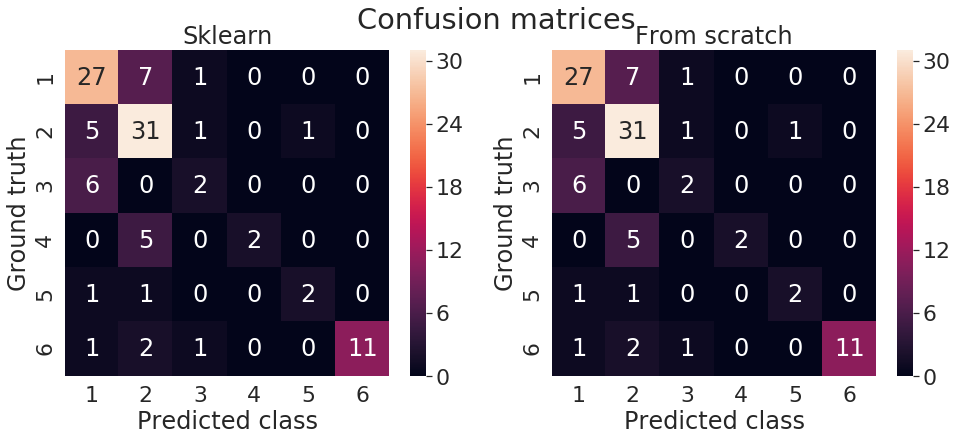

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
neigh.fit(x_train,data[::2]["Type"])
y_test_sk = neigh.predict(x_test)
cm_sk = confusion_matrix(y_true, y_test_sk)
cm_sk_annot = pd.DataFrame(cm_sk, columns = np.arange(1,7), index = np.arange(1,7))


fig, axes = plt.subplots(1,2, figsize=[16,6])
plt.suptitle("Confusion matrices")

sns.heatmap(cm_sk_annot, ax = axes[0], annot = True)
axes[0].set_ylabel("Ground truth")
axes[0].set_xlabel("Predicted class")
sns.set(font_scale=2)
axes[0].set_title("Sklearn")

sns.heatmap(conf_matr_annot, ax = axes[1], annot = True)
axes[1].set_ylabel("Ground truth")
axes[1].set_xlabel("Predicted class")
sns.set(font_scale=2)
axes[1].set_title("From scratch")

        The graph above proves that our version of the kNN-algorithm doesn't deviate from the scikit implementation in terms of returns, so our version, that was built from scratch, was formulated properly.